In [61]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [62]:
#READING
train=pd.read_csv('D:/R/Mobility Analytics/train.csv')
test=pd.read_csv('D:/R/Mobility Analytics/test.csv')

In [63]:
#Combine test and train into one file
master= pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, master.shape)
master.head()

(131662, 14) (87395, 13) (219057, 14)


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0


In [64]:
# DATA TYPES
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  185689 non-null  object 
 3   Customer_Since_Months        209171 non-null  float64
 4   Life_Style_Index             185537 non-null  float64
 5   Confidence_Life_Style_Index  185537 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Var1                         101238 non-null  float64
 10  Var2                         219057 non-null  int64  
 11  Var3                         219057 non-null  int64  
 12  Gender                       219057 non-null  object 
 13 

In [65]:
# Check column names
print(master.columns)

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')


In [66]:
# check na
master.isnull().sum()/len(master)*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.232565
Customer_Since_Months           4.512981
Life_Style_Index               15.301953
Confidence_Life_Style_Index    15.301953
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.784631
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type             39.896009
dtype: float64

In [67]:
# CHECK UNIQUE VALUES

master.apply(lambda x : len(x.unique()))

Trip_ID                        219057
Trip_Distance                   10594
Type_of_Cab                         6
Customer_Since_Months              12
Life_Style_Index                69678
Confidence_Life_Style_Index         4
Destination_Type                   14
Customer_Rating                  3976
Cancellation_Last_1Month            9
Var1                              131
Var2                               61
Var3                              102
Gender                              2
Surge_Pricing_Type                  4
dtype: int64

In [68]:
# VISUALISING CATEGORICAL
categorical_columns=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Cancellation_Last_1Month','Gender']
numerical=['Customer_Rating','Trip_Distance','Life_Style_Index','Var1','Var2','Var3']
final=master[categorical_columns+numerical]


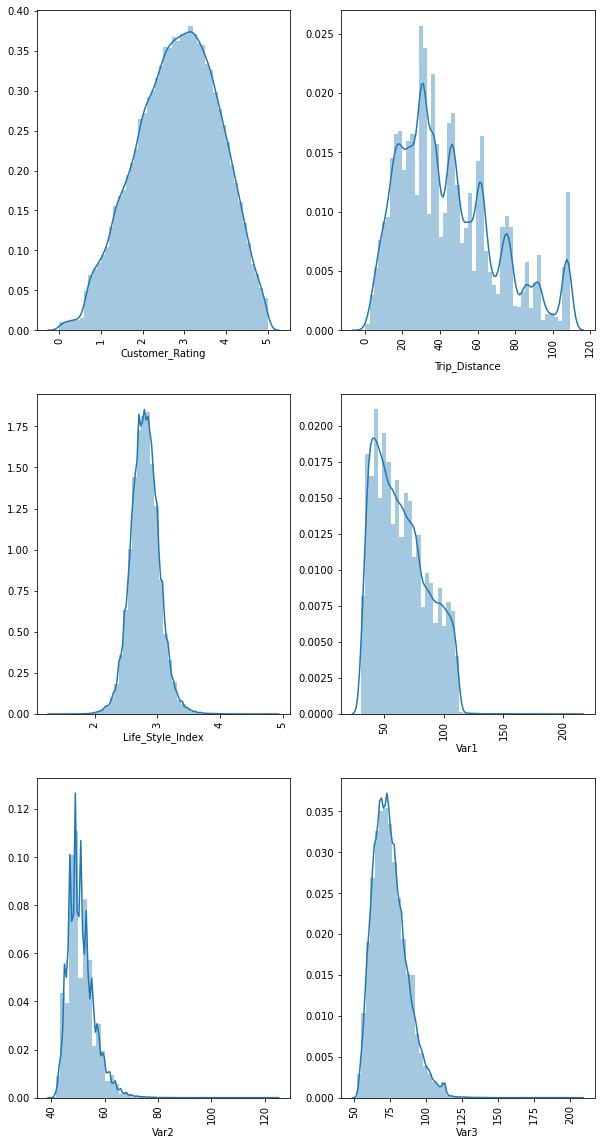

In [69]:
#VISUALISING NUMERICAL
fig, ax=plt.subplots(3,2,figsize=(10,20))
for variable,subplot in zip(numerical,ax.flatten()):
    sns.distplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

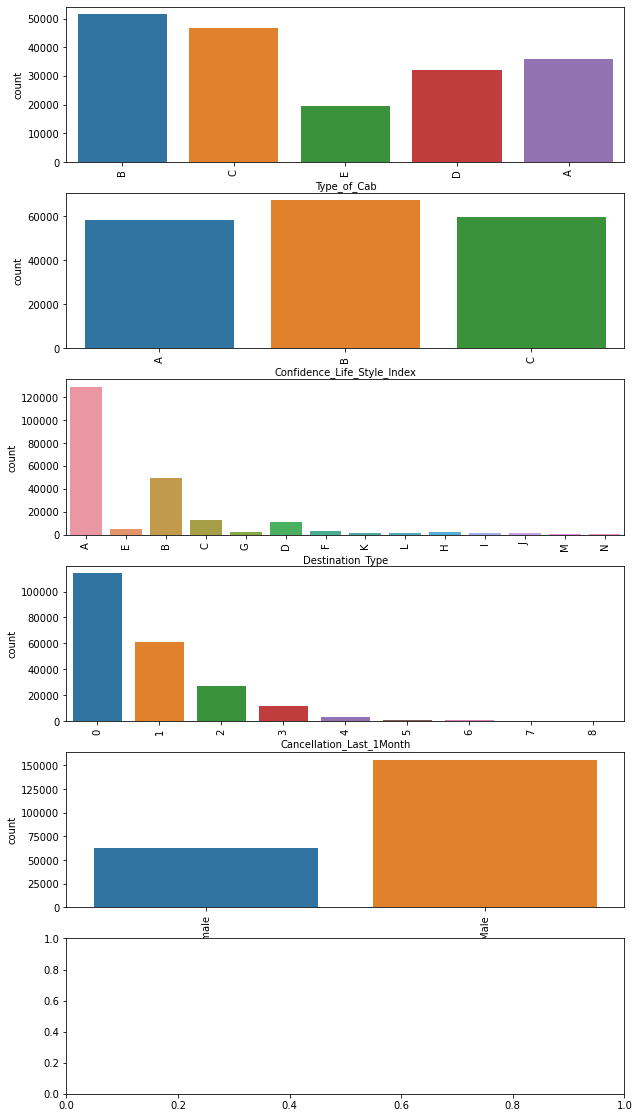

In [70]:
#CATEGORICAL
fig, ax=plt.subplots(6,figsize=(10,20))
for variable,subplot in zip(categorical_columns,ax.flatten()):
    sns.countplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

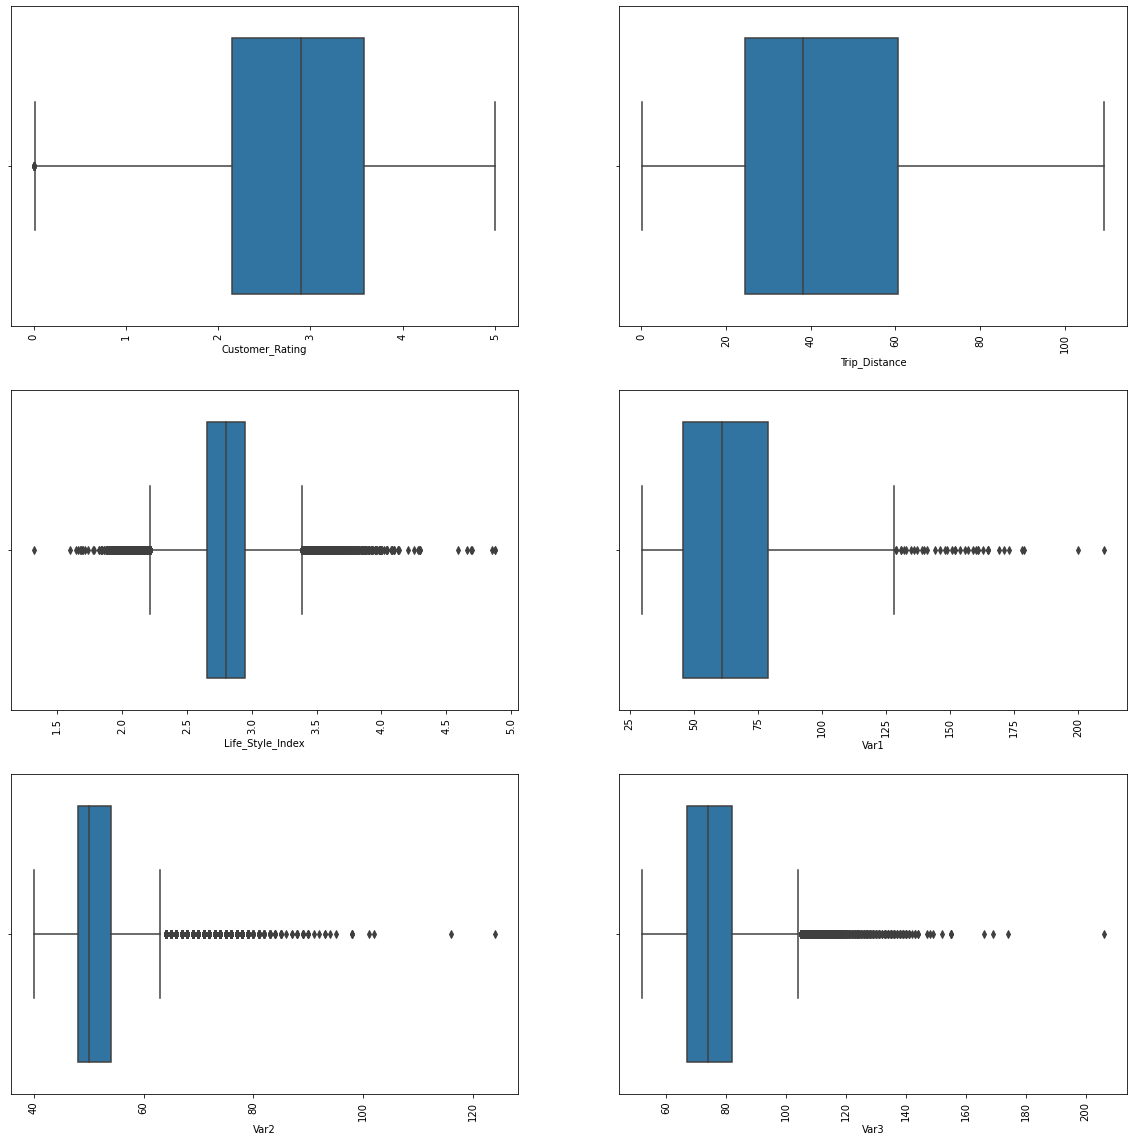

In [71]:
# VISUALISING BOXPLOT
fig, ax=plt.subplots(3,2,figsize=(20,20))
for variable,subplot in zip(numerical,ax.flatten()):
    sns.boxplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

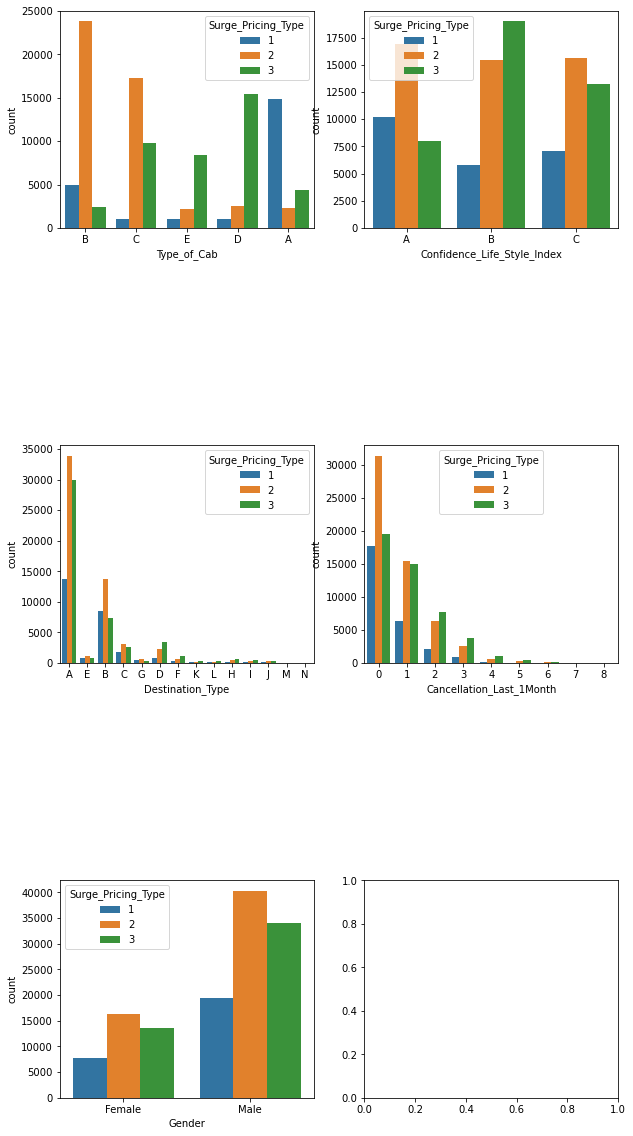

In [72]:
#### VISUALIZING CATEGORICAL WITH TARGET #####

fig,axes = plt.subplots(3,2,figsize=(10,20))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Surge_Pricing_Type',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

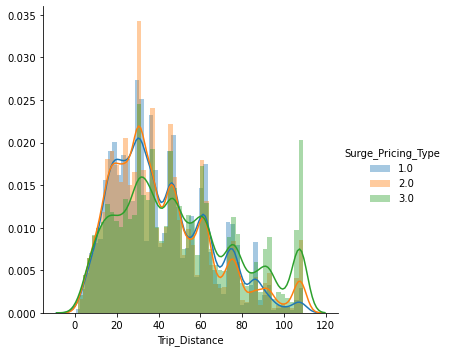

In [73]:
#SURGE 3 ARE SEEMS TO BE HIGH 
sns.FacetGrid(master,hue="Surge_Pricing_Type",size=5).map(sns.distplot,"Trip_Distance").add_legend()

In [74]:
#############DATA CLEANING#############

#1.TYPE OF CAB
master['Type_of_Cab']=master['Type_of_Cab'].fillna('F')

#2. CUSTOMER SINCE MONTHS
master.Customer_Since_Months.fillna(12,inplace=True)
master.Customer_Since_Months = master.Customer_Since_Months.astype(int)

#3.LIFESTYLE INDEX
master.Life_Style_Index.fillna(master.Life_Style_Index.mean(),inplace=True)

#4.CONFIDENCE LIFESTYLE INDEX
master.Confidence_Life_Style_Index.fillna('D',inplace=True)

#5.VAR1
master.Var1.fillna(master.Var1.median(),inplace=True)




In [75]:
###################OUTLIER TREATMENT###############  # z
#LOG TRANSFRMATION#
master.Var1=np.log1p(master.Var1)
master.Var2=np.log1p(master.Var2)

#OUTLIER TREATMENT#
master.Var1.loc[master.Var1 > 4.700480]=4.700480
master.Var2.loc[master.Var2 > 4.204693]=4.204693
master.Var3.loc[master.Var3 > 109.0]=109.0
master.Life_Style_Index.loc[master.Life_Style_Index > 3.360684]=3.360684

In [76]:
##FEATURE ENGINEERING###
master["Trip_Distance_per_destType"] = master["Trip_Distance"]/master.groupby(['Destination_Type'])['Trip_Distance'].transform('mean')
master["Trip_Distance_per_CabType"] = master["Trip_Distance"]/master.groupby(['Type_of_Cab'])['Trip_Distance'].transform('mean')
master["Trip_Distance_per_lifeStyle"] = master["Trip_Distance"]/master.groupby(['Confidence_Life_Style_Index'])['Trip_Distance'].transform('mean')


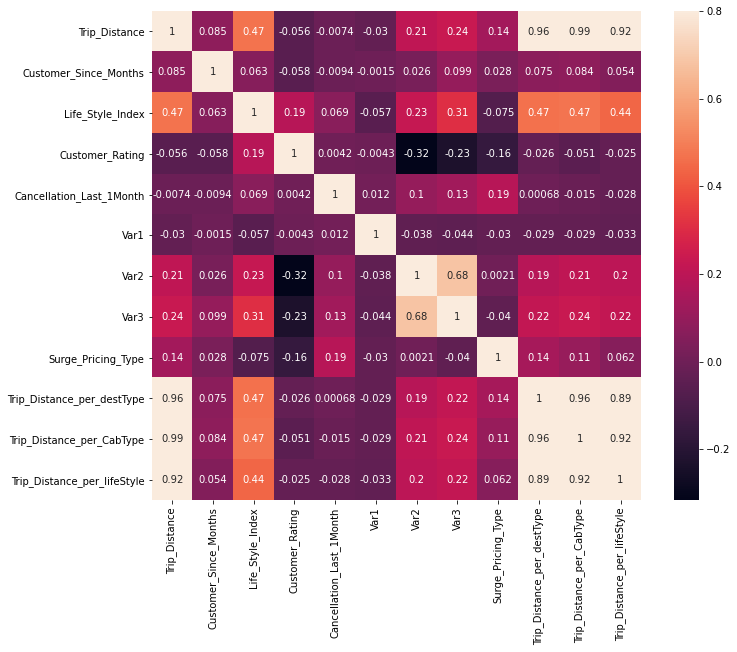

In [77]:
##CORRELATION MATRIX#
corrmat = master.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

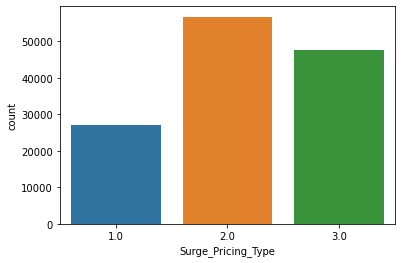

In [78]:
sns.countplot(master.Surge_Pricing_Type)

In [79]:
#LABEL ENCODING#

gt=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Cancellation_Last_1Month','Gender']
for i in gt:
    master[i]=le.fit_transform(master[i])

In [80]:
###########MODEL BUILDING###########
master= pd.get_dummies(master, columns=gt)
X = master[master['Surge_Pricing_Type'].isnull()!=True].drop(['Trip_ID','Surge_Pricing_Type'], axis=1)
y = master[master['Surge_Pricing_Type'].isnull()!=True]['Surge_Pricing_Type']

X_test = master[master['Surge_Pricing_Type'].isnull()==True].drop(['Trip_ID','Surge_Pricing_Type'], axis=1)

########SPLITTING#####
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

#SCALING
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.fit_transform(x_val)



In [23]:
# These are the class weights for each class
class_1 =( len(y) - len(y[y==1]))/len(y)
class_2 =( len(y) - len(y[y==2]))/len(y)
class_3 =( len(y) - len(y[y==3]))/len(y)
print(class_1,class_2,class_3)

0.7933040664732421 0.5691391593626103 0.6375567741641476


In [24]:
#LIGHT GBM#

weight = {1: '0.79', 2: '0.56', 3: '0.63'}
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

err = []
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       class_weight = weight,
                       min_child_weight = 0.02,
                       colsample_bytree=0.6, 
                       random_state=7,
                       objective='multiclass')
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict(x_val)
    print(i, " err_lgm: ", accuracy_score(y_val, pred_y))
    err.append(accuracy_score(y_val, pred_y))
    pred_test = m.predict(X_test)
    i = i + 1
    y_pred_tot_lgm.append(pred_test)
  

Training until validation scores don't improve for 200 rounds
[200]	training's multi_logloss: 0.695165	valid_1's multi_logloss: 0.707956
[400]	training's multi_logloss: 0.67447	valid_1's multi_logloss: 0.700752
[600]	training's multi_logloss: 0.660361	valid_1's multi_logloss: 0.699552
[800]	training's multi_logloss: 0.64809	valid_1's multi_logloss: 0.700207
Early stopping, best iteration is:
[618]	training's multi_logloss: 0.659136	valid_1's multi_logloss: 0.699461
1  err_lgm:  0.7016404647983595
Training until validation scores don't improve for 200 rounds
[200]	training's multi_logloss: 0.696023	valid_1's multi_logloss: 0.698772
[400]	training's multi_logloss: 0.675305	valid_1's multi_logloss: 0.691643
[600]	training's multi_logloss: 0.661409	valid_1's multi_logloss: 0.6906
[800]	training's multi_logloss: 0.649544	valid_1's multi_logloss: 0.690908
Early stopping, best iteration is:
[653]	training's multi_logloss: 0.658153	valid_1's multi_logloss: 0.690376
2  err_lgm:  0.7085896559580

In [33]:
np.mean(err, 0)

0.7036882629891871

In [42]:
err[1]

submission = pd.DataFrame()
submission['Trip_ID'] = master[master['Surge_Pricing_Type'].isnull()==True]['Trip_ID']
submission['Surge_Pricing_Type'] = y_pred_tot_lgm[8]
submission.to_csv('normalfolds.csv', index=False, header=True)

0.708589655958077

In [58]:
train_len = train.shape[0]
test_len = test.shape[0]

train_df = master[:train_len]
test_df = master[train_len:]

target_map = {1:0, 2:1, 3:2}
target_map_inverse = {0:1, 1:2, 2:3}

train_df["Surge_Pricing_Type"] = train_df["Surge_Pricing_Type"].map(target_map)
features = [col for col in train_df.columns if col not in ["Trip_ID", "Surge_Pricing_Type"]]
target = train_df["Surge_Pricing_Type"]


In [48]:
#CV2#
import lightgbm as lgb

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':3,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'verbosity': 1
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)
predictions = np.zeros((len(test_df), 3))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    predictions_val = np.argmax(clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration), axis=1)
    
    print("CV score: {:<8.5f}".format(accuracy_score(predictions_val, target.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.681044	valid_1's multi_logloss: 0.700198
[2000]	training's multi_logloss: 0.649247	valid_1's multi_logloss: 0.690051
[3000]	training's multi_logloss: 0.628032	valid_1's multi_logloss: 0.688669
[4000]	training's multi_logloss: 0.60921	valid_1's multi_logloss: 0.689026
Early stopping, best iteration is:
[3210]	training's multi_logloss: 0.624021	valid_1's multi_logloss: 0.688581
CV score: 0.70600 
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.679486	valid_1's multi_logloss: 0.706172
[2000]	training's multi_logloss: 0.647428	valid_1's multi_logloss: 0.696395
[3000]	training's multi_logloss: 0.625814	valid_1's multi_logloss: 0.694958
[4000]	training's multi_logloss: 0.607065	valid_1's multi_logloss: 0.695341
Early stopping, best iteration is:
[3074]	training's multi_logloss: 0.624341	valid_1's multi_logloss: 0.694941
CV score: 0.

In [82]:
#CV2#
import lightgbm as lgb

target_map = {1:0, 2:1, 3:2}
target_map_inverse = {0:1, 1:2, 2:3}

y= y.map(target_map)

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':3,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'verbosity': 1
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)
predictions = np.zeros((len(test_df), 3))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X,y)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    predictions_val = np.argmax(clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration), axis=1)
    
    print("CV score: {:<8.5f}".format(accuracy_score(predictions_val, y.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.681044	valid_1's multi_logloss: 0.700198
[2000]	training's multi_logloss: 0.649247	valid_1's multi_logloss: 0.690051
[3000]	training's multi_logloss: 0.628032	valid_1's multi_logloss: 0.688669
[4000]	training's multi_logloss: 0.60921	valid_1's multi_logloss: 0.689026
Early stopping, best iteration is:
[3210]	training's multi_logloss: 0.624021	valid_1's multi_logloss: 0.688581
CV score: 0.70600 
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.679486	valid_1's multi_logloss: 0.706172
[2000]	training's multi_logloss: 0.647428	valid_1's multi_logloss: 0.696395
[3000]	training's multi_logloss: 0.625814	valid_1's multi_logloss: 0.694958
[4000]	training's multi_logloss: 0.607065	valid_1's multi_logloss: 0.695341
Early stopping, best iteration is:
[3074]	training's multi_logloss: 0.624341	valid_1's multi_logloss: 0.694941
CV score: 0.

In [83]:
predictions_test = np.argmax(predictions, axis=1)
submission = pd.read_csv("D:/R/Mobility Analytics/sample_submission_NoPBkjr.csv")
submission["Surge_Pricing_Type"] = predictions_test
submission["Surge_Pricing_Type"] = submission["Surge_Pricing_Type"].map(target_map_inverse)
submission.to_csv("janatahack_mobi.csv", index=False)